**Phase-1: To create and manipulate graph-structured data via the GraphsTuple class and utils_np and utils_tf utilities.**

**Phase-2: Using actual graph networks (Graph Net modules)** 

**Phase-1**

In [0]:
pip install graph_nets

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import itertools
import time

from graph_nets import graphs
from graph_nets import utils_np
from graph_nets import utils_tf
from graph_nets import modules
from graph_nets import blocks
from graph_nets.demos import models
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy import spatial
import tensorflow as tf
import sonnet as snt

SEED = 1
np.random.seed(SEED)
tf.set_random_seed(SEED)

**Creating Graphs**

In [0]:
# Global features for graph 0.
globals_0 = [1., 2., 3.]

# Node features for graph 0.
nodes_0 = [[10., 20., 30.],  # Node 0
           [11., 21., 31.],  # Node 1
           [12., 22., 32.],  # Node 2
           [13., 23., 33.],  # Node 3
           [14., 24., 34.]]  # Node 4

# Edge features for graph 0.
edges_0 = [[100., 200.],  # Edge 0
           [101., 201.],  # Edge 1
           [102., 202.],  # Edge 2
           [103., 203.],  # Edge 3
           [104., 204.],  # Edge 4
           [105., 205.]]  # Edge 5

# The sender and receiver nodes associated with each edge for graph 0.
senders_0 = [0,  # Index of the sender node for edge 0
             1,  # Index of the sender node for edge 1
             1,  # Index of the sender node for edge 2
             2,  # Index of the sender node for edge 3
             2,  # Index of the sender node for edge 4
             3]  # Index of the sender node for edge 5
receivers_0 = [1,  # Index of the receiver node for edge 0
               2,  # Index of the receiver node for edge 1
               3,  # Index of the receiver node for edge 2
               0,  # Index of the receiver node for edge 3
               3,  # Index of the receiver node for edge 4
               4]  # Index of the receiver node for edge 5

# Global features for graph 1.
globals_1 = [1001., 1002., 1003.]

# Node features for graph 1.
nodes_1 = [[1010., 1020., 1030.],  # Node 0
           [1011., 1021., 1031.]]  # Node 1

# Edge features for graph 1.
edges_1 = [[1100., 1200.],  # Edge 0
           [1101., 1201.],  # Edge 1
           [1102., 1202.],  # Edge 2
           [1103., 1203.]]  # Edge 3

# The sender and receiver nodes associated with each edge for graph 1.
senders_1 = [0,  # Index of the sender node for edge 0
             0,  # Index of the sender node for edge 1
             1,  # Index of the sender node for edge 2
             1]  # Index of the sender node for edge 3
receivers_1 = [0,  # Index of the receiver node for edge 0
               1,  # Index of the receiver node for edge 1
               0,  # Index of the receiver node for edge 2
               0]  # Index of the receiver node for edge 3

data_dict_0 = {
    "globals": globals_0,
    "nodes": nodes_0,
    "edges": edges_0,
    "senders": senders_0,
    "receivers": receivers_0
}

data_dict_1 = {
    "globals": globals_1,
    "nodes": nodes_1,
    "edges": edges_1,
    "senders": senders_1,
    "receivers": receivers_1
}

**Put graph dictionaries into graph tuples**

In [0]:
data_dict_list = [data_dict_0, data_dict_1]
graphs_tuple = utils_np.data_dicts_to_graphs_tuple(data_dict_list)

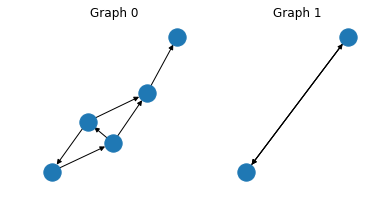

In [0]:
graphs_nx = utils_np.graphs_tuple_to_networkxs(graphs_tuple)
_, axs = plt.subplots(ncols=2, figsize=(6, 3))
for iax, (graph_nx, ax) in enumerate(zip(graphs_nx, axs)):
  nx.draw(graph_nx, ax=ax)
  ax.set_title("Graph {}".format(iax))

**Print the GraphsTuple fields**

In [0]:
def print_graphs_tuple(graphs_tuple):
  print("Shapes of GraphsTuple's fields:")
  print(graphs_tuple.map(lambda x: x if x is None else x.shape, fields=graphs.ALL_FIELDS))
  print("\nData contained in GraphsTuple's fields:")
  print("globals:\n{}".format(graphs_tuple.globals))
  print("nodes:\n{}".format(graphs_tuple.nodes))
  print("edges:\n{}".format(graphs_tuple.edges))
  print("senders:\n{}".format(graphs_tuple.senders))
  print("receivers:\n{}".format(graphs_tuple.receivers))
  print("n_node:\n{}".format(graphs_tuple.n_node))
  print("n_edge:\n{}".format(graphs_tuple.n_edge))
  
print_graphs_tuple(graphs_tuple)

Shapes of GraphsTuple's fields:
GraphsTuple(nodes=(7, 3), edges=(10, 2), receivers=(10,), senders=(10,), globals=(2, 3), n_node=(2,), n_edge=(2,))

Data contained in GraphsTuple's fields:
globals:
[[1.000e+00 2.000e+00 3.000e+00]
 [1.001e+03 1.002e+03 1.003e+03]]
nodes:
[[  10.   20.   30.]
 [  11.   21.   31.]
 [  12.   22.   32.]
 [  13.   23.   33.]
 [  14.   24.   34.]
 [1010. 1020. 1030.]
 [1011. 1021. 1031.]]
edges:
[[ 100.  200.]
 [ 101.  201.]
 [ 102.  202.]
 [ 103.  203.]
 [ 104.  204.]
 [ 105.  205.]
 [1100. 1200.]
 [1101. 1201.]
 [1102. 1202.]
 [1103. 1203.]]
senders:
[0 1 1 2 2 3 5 5 6 6]
receivers:
[1 2 3 0 3 4 5 6 5 5]
n_node:
[5 2]
n_edge:
[6 4]


**Retrieve back a list of graph dicts**

In [0]:
recovered_data_dict_list = utils_np.graphs_tuple_to_data_dicts(graphs_tuple)

**Creating a GraphsTuple from a networkx graph**

Shapes of GraphsTuple's fields:
GraphsTuple(nodes=(4, 2), edges=(3, 2), receivers=(3,), senders=(3,), globals=(1, 3), n_node=(1,), n_edge=(1,))

Data contained in GraphsTuple's fields:
globals:
[[0.6 0.7 0.8]]
nodes:
[[0.3 1.3]
 [0.4 1.4]
 [0.5 1.5]
 [0.6 1.6]]
edges:
[[3.6 3.7]
 [5.6 5.7]
 [6.6 6.7]]
senders:
[0 2 3]
receivers:
[1 0 0]
n_node:
[4]
n_edge:
[3]


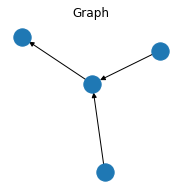

In [0]:
graph_nx = nx.OrderedMultiDiGraph()

# Globals.
graph_nx.graph["features"] = np.array([0.6, 0.7, 0.8])

# Nodes.
graph_nx.add_node(0, features=np.array([0.3, 1.3]))
graph_nx.add_node(1, features=np.array([0.4, 1.4]))
graph_nx.add_node(2, features=np.array([0.5, 1.5]))
graph_nx.add_node(3, features=np.array([0.6, 1.6]))
# Edges.
graph_nx.add_edge(0, 1, features=np.array([3.6, 3.7]))
graph_nx.add_edge(2, 0, features=np.array([5.6, 5.7]))
graph_nx.add_edge(3, 0, features=np.array([6.6, 6.7]))

ax = plt.figure(figsize=(3, 3)).gca()
nx.draw(graph_nx, ax=ax)
ax.set_title("Graph")

graphs_tuple = utils_np.networkxs_to_graphs_tuple([graph_nx])

print_graphs_tuple(graphs_tuple)

**Tensor GraphsTuple**

**Defining functions for generating and plotting graphs**

In [0]:
GLOBAL_SIZE = 4
NODE_SIZE = 5
EDGE_SIZE = 6

def get_graph_data_dict(num_nodes, num_edges):
  return {
      "globals": np.random.rand(GLOBAL_SIZE).astype(np.float32),
      "nodes": np.random.rand(num_nodes, NODE_SIZE).astype(np.float32),
      "edges": np.random.rand(num_edges, EDGE_SIZE).astype(np.float32),
      "senders": np.random.randint(num_nodes, size=num_edges, dtype=np.int32),
      "receivers": np.random.randint(num_nodes, size=num_edges, dtype=np.int32),
  }

graph_3_nodes_4_edges = get_graph_data_dict(num_nodes=3, num_edges=4)
graph_5_nodes_8_edges = get_graph_data_dict(num_nodes=5, num_edges=8)
graph_7_nodes_13_edges = get_graph_data_dict(num_nodes=7, num_edges=13)
graph_9_nodes_25_edges = get_graph_data_dict(num_nodes=9, num_edges=25)

graph_dicts = [graph_3_nodes_4_edges, graph_5_nodes_8_edges,
               graph_7_nodes_13_edges, graph_9_nodes_25_edges]

def plot_graphs_tuple_np(graphs_tuple):
  networkx_graphs = utils_np.graphs_tuple_to_networkxs(graphs_tuple)
  num_graphs = len(networkx_graphs)
  _, axes = plt.subplots(1, num_graphs, figsize=(5*num_graphs, 5))
  if num_graphs == 1:
    axes = axes,
  for graph, ax in zip(networkx_graphs, axes):
    plot_graph_networkx(graph, ax)


def plot_graph_networkx(graph, ax, pos=None):
  node_labels = {node: "{:.3g}".format(data["features"][0])
                 for node, data in graph.nodes(data=True)
                 if data["features"] is not None}
  edge_labels = {(sender, receiver): "{:.3g}".format(data["features"][0])
                 for sender, receiver, data in graph.edges(data=True)
                 if data["features"] is not None}
  global_label = ("{:.3g}".format(graph.graph["features"][0])
                  if graph.graph["features"] is not None else None)

  if pos is None:
    pos = nx.spring_layout(graph)
  nx.draw_networkx(graph, pos, ax=ax, labels=node_labels)

  if edge_labels:
    nx.draw_networkx_edge_labels(graph, pos, edge_labels, ax=ax)

  if global_label:
    plt.text(0.05, 0.95, global_label, transform=ax.transAxes)

  ax.yaxis.set_visible(False)
  ax.xaxis.set_visible(False)
  return pos

def plot_compare_graphs(graphs_tuples, labels):
  pos = None
  num_graphs = len(graphs_tuples)
  _, axes = plt.subplots(1, num_graphs, figsize=(5*num_graphs, 5))
  if num_graphs == 1:
    axes = axes,
  pos = None
  for name, graphs_tuple, ax in zip(labels, graphs_tuples, axes):
    graph = utils_np.graphs_tuple_to_networkxs(graphs_tuple)[0]
    pos = plot_graph_networkx(graph, ax, pos=pos)
    ax.set_title(name)

**Creating a constant tensor graphs tuple from data dicts**

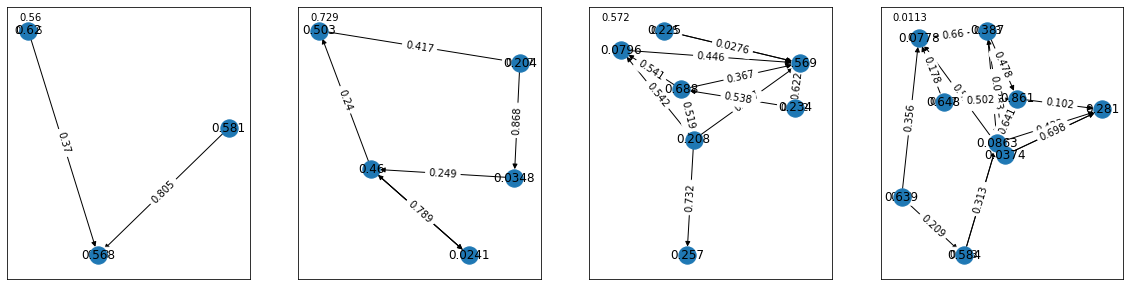

In [0]:
tf.reset_default_graph()
graphs_tuple_tf = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)

with tf.Session() as sess:
  graphs_tuple_np = sess.run(graphs_tuple_tf)
  
plot_graphs_tuple_np(graphs_tuple_np)

**GraphsTuple placeholders - to pass data into a session via placeholder tensors**

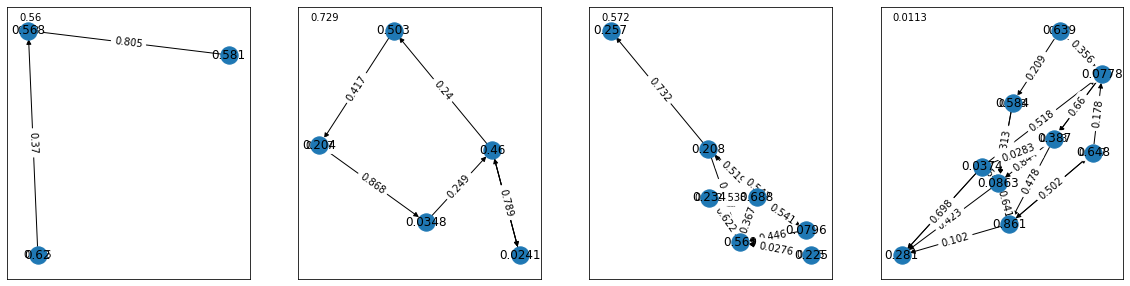

In [0]:
tf.reset_default_graph()

# Create a placeholder using the first graph in the list as template.
graphs_tuple_ph = utils_tf.placeholders_from_data_dicts(graph_dicts[3:4])

with tf.Session() as sess:
  # Feeding a batch of graphs with different sizes, and different
  # numbers of nodes and edges through the placeholder.
  feed_dict = utils_tf.get_feed_dict(
      graphs_tuple_ph, utils_np.data_dicts_to_graphs_tuple(graph_dicts[0:]))

  graphs_tuple_np = sess.run(graphs_tuple_ph, feed_dict)

plot_graphs_tuple_np(graphs_tuple_np)

**Retreiving a subset of graphs from a batch represented by GraphsTuple**

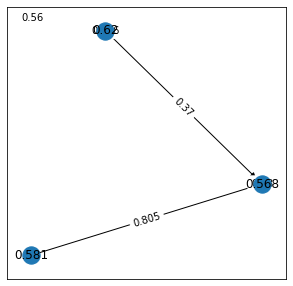

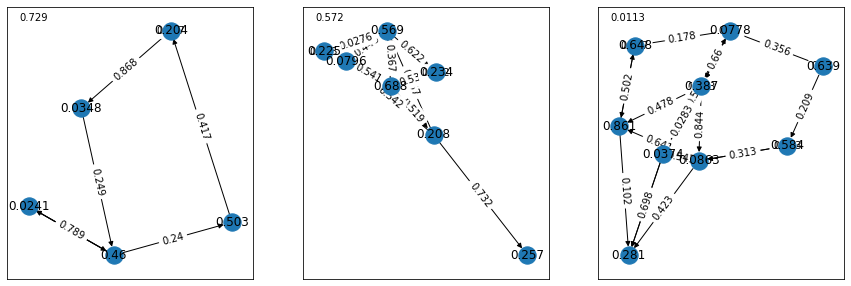

In [0]:
tf.reset_default_graph()
graphs_tuple_tf = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)

first_graph_tf = utils_tf.get_graph(graphs_tuple_tf, 0)
three_graphs_tf = utils_tf.get_graph(graphs_tuple_tf, slice(1, 4))

with tf.Session() as sess:
  first_graph_np = sess.run(first_graph_tf)
  three_graphs_np = sess.run(three_graphs_tf)

plot_graphs_tuple_np(first_graph_np)
plot_graphs_tuple_np(three_graphs_np)

**Concatenating multiple GraphsTuple instances along the batch dimension**

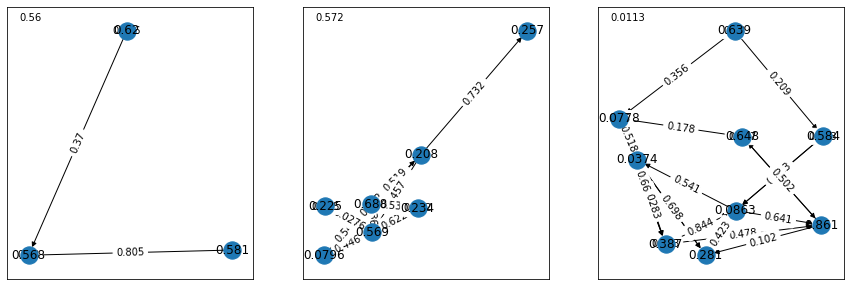

In [0]:
tf.reset_default_graph()
graphs_tuple_1_tf = utils_tf.data_dicts_to_graphs_tuple(graph_dicts[0:1])
graphs_tuple_2_tf = utils_tf.data_dicts_to_graphs_tuple(graph_dicts[2:])

graphs_tuple_tf = utils_tf.concat([graphs_tuple_1_tf, graphs_tuple_2_tf], axis=0)

with tf.Session() as sess:
  graphs_tuple_np = sess.run(graphs_tuple_tf)

plot_graphs_tuple_np(graphs_tuple_np)

**Phase-2: Graph Net modules**

![Graph Network block](https://github.com/deepmind/graph_nets/raw/master/images/graph-network.png)

A graph network has up to three learnable sub-functions: edge ($\phi^e$), node ($\phi^v$), and global ($\phi^u$) in the schematic above.
To instantiate a graph network module in the library, these sub-functions are specified via constructor arguments which are `callable`s that return Sonnet modules, such as `snt.Linear` or `snt.nets.MLP`.
The reason that a `callable` is provided, instead of the module/method directly, is so the Graph Net object owns the modules and the variables created by them.

In [0]:
tf.reset_default_graph()
OUTPUT_EDGE_SIZE = 10
OUTPUT_NODE_SIZE = 11
OUTPUT_GLOBAL_SIZE = 12
graph_network = modules.GraphNetwork(
    edge_model_fn = lambda: snt.Linear(output_size = OUTPUT_EDGE_SIZE),
    node_model_fn = lambda: snt.Linear(output_size = OUTPUT_NODE_SIZE),
    global_model_fn = lambda: snt.Linear(output_size = OUTPUT_GLOBAL_SIZE))

**Feeding a graphs tuple to a Graph Net**
The network returns an output graph with same number of nodes, edges and edge connectivity but with updated edge, node and global features.

In [0]:
input_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)
output_graphs = graph_network(input_graphs)

print("Output edges size: {}".format(output_graphs.edges.shape[-1]))  # Equal to OUTPUT_EDGE_SIZE
print("Output nodes size: {}".format(output_graphs.nodes.shape[-1]))  # Equal to OUTPUT_NODE_SIZE
print("Output globals size: {}".format(output_graphs.globals.shape[-1]))  # Equal to OUTPUT_GLOBAL_SIZE

Instructions for updating:
Colocations handled automatically by placer.
Output edges size: 10
Output nodes size: 11
Output globals size: 12


**Connecting a GraphNetwork recurrently**

In [0]:
tf.reset_default_graph()

input_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)

graph_network = modules.GraphNetwork(
    edge_model_fn=lambda: snt.Linear(output_size=EDGE_SIZE),
    node_model_fn=lambda: snt.Linear(output_size=NODE_SIZE),
    global_model_fn=lambda: snt.Linear(output_size=GLOBAL_SIZE))

num_recurrent_passes = 3
previous_graphs = input_graphs
for unused_pass in range(num_recurrent_passes):
  previous_graphs = graph_network(previous_graphs)
output_graphs = previous_graphs

**Graph Net building blocks**

**Broadcast operations - allow to transfer information between different types of elements in the graph**

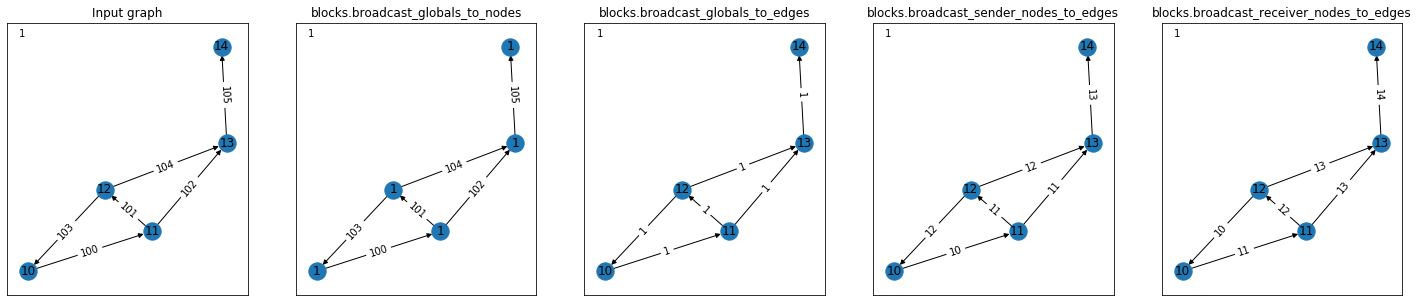

In [0]:
tf.reset_default_graph()

graphs_tuple = utils_tf.data_dicts_to_graphs_tuple([data_dict_0])
updated_broadcast_globals_to_nodes = graphs_tuple.replace(
    nodes=blocks.broadcast_globals_to_nodes(graphs_tuple))
updated_broadcast_globals_to_edges = graphs_tuple.replace(
    edges=blocks.broadcast_globals_to_edges(graphs_tuple))
updated_broadcast_sender_nodes_to_edges = graphs_tuple.replace(
    edges=blocks.broadcast_sender_nodes_to_edges(graphs_tuple))
updated_broadcast_receiver_nodes_to_edges = graphs_tuple.replace(
    edges=blocks.broadcast_receiver_nodes_to_edges(graphs_tuple))

with tf.Session() as sess:
  output_graphs = sess.run([
      graphs_tuple,
      updated_broadcast_globals_to_nodes,
      updated_broadcast_globals_to_edges,
      updated_broadcast_sender_nodes_to_edges,
      updated_broadcast_receiver_nodes_to_edges])

plot_compare_graphs(output_graphs, labels=[
    "Input graph",
    "blocks.broadcast_globals_to_nodes",
    "blocks.broadcast_globals_to_edges",
    "blocks.broadcast_sender_nodes_to_edges",
    "blocks.broadcast_receiver_nodes_to_edges"])

**We can easily use broadcasters to, for example, set the value of each edge to be the sum of the first feature element of: the input edges, the sender nodes, the receiver nodes, and the global feature.**

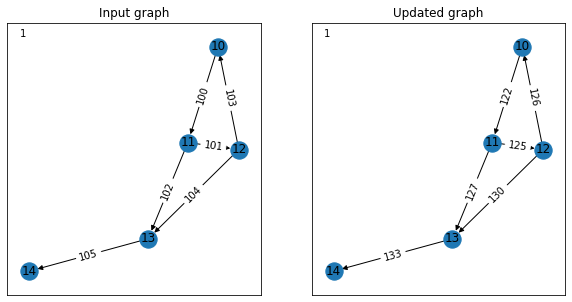

In [0]:
tf.reset_default_graph()
graphs_tuple = utils_tf.data_dicts_to_graphs_tuple([data_dict_0])

updated_graphs_tuple = graphs_tuple.replace(
    edges=(graphs_tuple.edges[:, :1] +
           blocks.broadcast_receiver_nodes_to_edges(graphs_tuple)[:, :1] +
           blocks.broadcast_sender_nodes_to_edges(graphs_tuple)[:, :1] +
           blocks.broadcast_globals_to_edges(graphs_tuple)[:, :1]))

with tf.Session() as sess:
  output_graphs = sess.run([
      graphs_tuple,
      updated_graphs_tuple])

plot_compare_graphs(output_graphs, labels=[
    "Input graph",
    "Updated graph"])

**Aggregators - perform reduce operations between different elements of the graph**

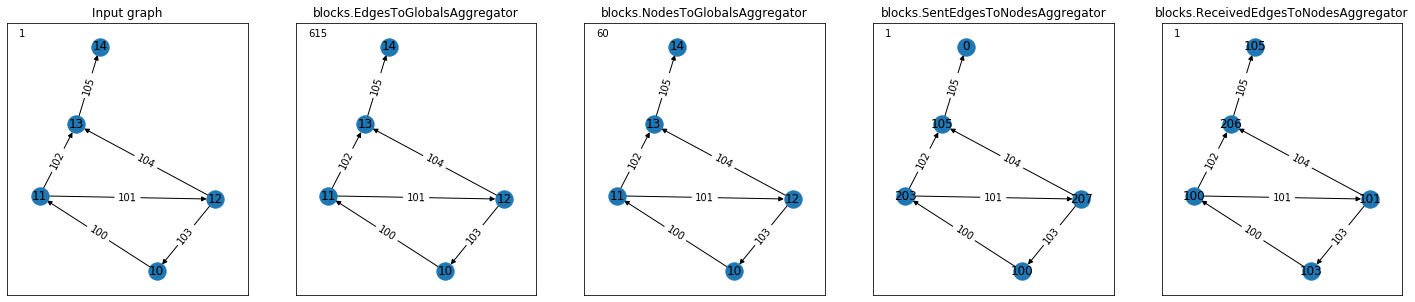

In [0]:
tf.reset_default_graph()

graphs_tuple = utils_tf.data_dicts_to_graphs_tuple([data_dict_0])

reducer = tf.unsorted_segment_sum #elementwise sum
updated_edges_to_globals = graphs_tuple.replace(
    globals=blocks.EdgesToGlobalsAggregator(reducer=reducer)(graphs_tuple))
updated_nodes_to_globals = graphs_tuple.replace(
    globals=blocks.NodesToGlobalsAggregator(reducer=reducer)(graphs_tuple))
updated_sent_edges_to_nodes = graphs_tuple.replace(
    nodes=blocks.SentEdgesToNodesAggregator(reducer=reducer)(graphs_tuple))
updated_received_edges_to_nodes = graphs_tuple.replace(
    nodes=blocks.ReceivedEdgesToNodesAggregator(reducer=reducer)(graphs_tuple))

with tf.Session() as sess:
  output_graphs = sess.run([
      graphs_tuple,
      updated_edges_to_globals,
      updated_nodes_to_globals,
      updated_sent_edges_to_nodes,
      updated_received_edges_to_nodes])

plot_compare_graphs(output_graphs, labels=[
    "Input graph",
    "blocks.EdgesToGlobalsAggregator",
    "blocks.NodesToGlobalsAggregator",
    "blocks.SentEdgesToNodesAggregator",
    "blocks.ReceivedEdgesToNodesAggregator"])

**EdgeBlock**
An EdgeBlock consists of applying a function to the concatenation of:
-  `graphs_tuple.edges`
- `blocks.broadcast_sender_nodes_to_edges(graphs_tuple)`
- `blocks.broadcast_receiver_nodes_to_edges(graphs_tuple)`
- `blocks.broadcast_globals_to_edges(graphs_tuple)`

The result is a graph with new edge features conditioned on input edges, nodes and global features according to the graph structure.

In [0]:
tf.reset_default_graph()
edge_block = blocks.EdgeBlock(
    edge_model_fn=lambda: snt.Linear(output_size=10))

input_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)
output_graphs = edge_block(input_graphs)

print(("Output edges size: {}".format(output_graphs.edges.shape[-1])))

Output edges size: 10


**Node block** A NodeBlock consists of applying a function to the concatenation of:
-  `graphs_tuple.nodes`
- `blocks.ReceivedEdgesToNodesAggregator(<reducer-function>)(graphs_tuple)`
- `blocks.broadcast_globals_to_nodes(graphs_tuple)`

The result is a graph with new node features conditioned on input edges, nodes and global features according to the graph structure.

In [0]:
tf.reset_default_graph()
node_block = blocks.NodeBlock(
    node_model_fn=lambda: snt.Linear(output_size=15))

input_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)
output_graphs = node_block(input_graphs)

print(("Output nodes size: {}".format(output_graphs.nodes.shape[-1])))

Output nodes size: 15


**Global block** A GlobalBlock consists of applying a function to the concatenation of:

- `graphs_tuple.globals`
- `blocks.EdgesToGlobalsAggregator(<reducer-function>)(graphs_tuple)`
- `blocks.NodesToGlobalsAggregator(<reducer-function>)(graphs_tuple)`

The result is a graph with new globals features conditioned on input edges, nodes and global features.

In [0]:
tf.reset_default_graph()
global_block = blocks.GlobalBlock(
    global_model_fn=lambda: snt.Linear(output_size=20))

input_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)
output_graphs = global_block(input_graphs)

print(("Output globals size: {}".format(output_graphs.globals.shape[-1])))

Output globals size: 20
